# Data is magic

## Motywacja

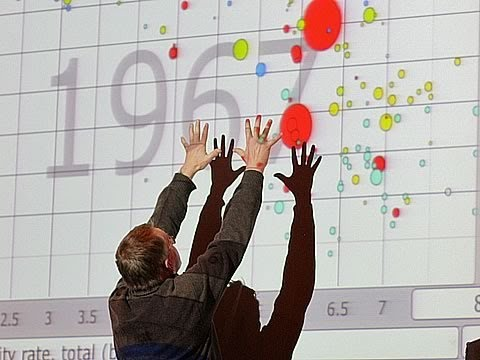

In [1]:
from IPython.display import YouTubeVideo
from datetime import timedelta
start=int(timedelta(hours=0, minutes=3, seconds=14).total_seconds())
YouTubeVideo("usdJgEwMinM", start=start, autoplay=1, theme="light", color="red")

## Wzór
<img src="http://www.randalolson.com/wp-content/uploads/data-ink.gif">

#### Ale zacznijmy od początku
Istnieje bardzo wiele rodzajów wykresów, warto wspierać się galerią matplotliba, by wybrać najodpowiedniejszy dla danych i sprawdzić, jak go utworzyć w pythonie: http://matplotlib.org/gallery.html

In [1]:
## IMPORTY
# wykresy będą wyświetlać się w notebooku nie osobnych oknach
%matplotlib inline  
import matplotlib.pyplot as plt  # biblioteka do rysowania wykresów
from matplotlib import cm        # schematy kolorów
from sklearn.datasets import make_blobs, load_iris  # moduły do generowania danych i obrabiania
import numpy as np

In [2]:
## GENEROWANIE DANYCH
blobs_X, blobs_y = make_blobs()
x = np.linspace(-10, 10,)
sin_X, sin_y = x, np.sin(x)
iris = load_iris()
iris_X, iris_y = iris.data, iris.target

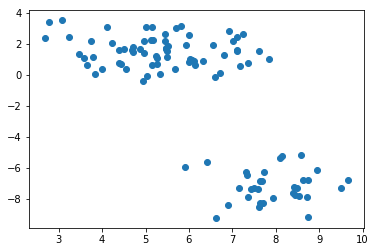

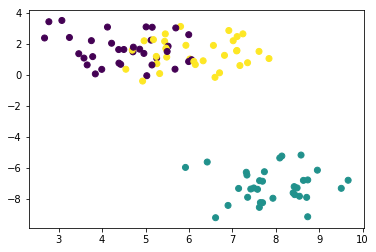

In [4]:
## DIAGRAMY Z PUNKTAMI
# blobs to dane o trzech wymiarach, w blobs_x trzymane są współrzędne punktów, w blobs_y ich etykieta
# scatter - wykres z punktami
# pierwszy parametr to wartości na osi x, drugi parametr to wartości na osi y
plt.scatter(blobs_X[:,0], blobs_X[:,1])
# bez poniższej linijki dane będą ciągle dodawane do wykresu (nie zostanie utworzony nowy)
plt.show()
# w parametrze c podajemy etykietę każdego punktu. Zostaną one przeliczone na kolory.
plt.scatter(blobs_X[:,0], blobs_X[:,1], c=blobs_y)
plt.show()

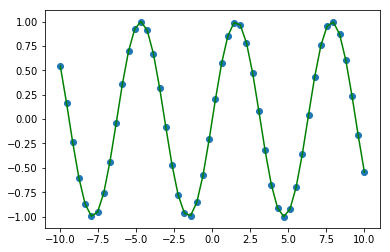

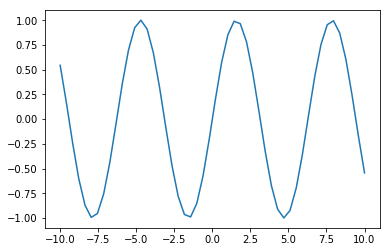

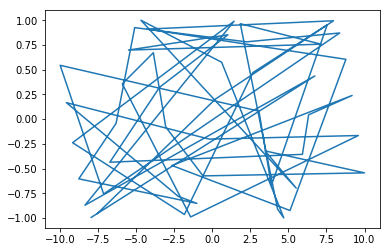

In [5]:
## ZWYKŁE WYKRESY
plt.scatter(sin_X, sin_y)
# nie wywołujemy plt.show(), więc kolejny wykres zostanie nałożony na pierwszy
# plot to taki scatter łączący punkty, które rysuje
# parametr c pozwala pokolorować dodane obiekty
plt.plot(sin_X, sin_y, c='green')
plt.show()

# ważne: punkty muszą być posortowane w osi x
# utwórzmy macierz ustawiając macierze sin_X i sin_y na sobie
random = np.vstack((sin_X, sin_y))
plt.plot(random[0], random[1])
plt.show()

np.random.shuffle(random.T)
plt.plot(random[0], random[1])
plt.show()

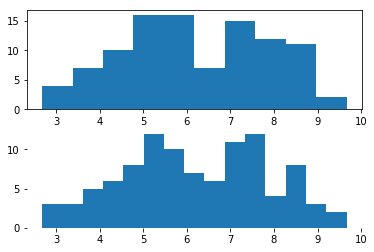

In [8]:
## HISTOGRAMY
# porównamy ze sobą dwa wykresy, które przedstawimy jeden pod drugim
# pierwszy wykres
# subplot - utwórz wykres z podwykresami
# parametry: liczba wierszy, liczba kolumn, numer aktualnego wykresu
plt.subplot(2, 1, 1)
# pierwszy parametr to dane, drugi odpowiada za liczbę kubełków
plt.hist(blobs_X[:, 0], 10)

# drugi wykres - ten będzie miał usuniętą "ramkę" i więcej kubełków
ax = plt.subplot(2, 1, 2)
plt.hist(blobs_X[:, 0], 15)
# Usuwamy obwódkę wokół wykresu dla przejrzystości
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

plt.show()

(-1.1277450543110561,
 1.1254301505648341,
 -1.1000000083248223,
 1.10000002010585)

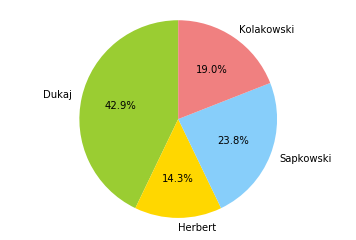

In [9]:
## PIE CHARTY
# "Kawałki tortu" będą posortowane i narysowane przeciwnie do ruchu wskazówek zegara.
authors = 'Dukaj', 'Herbert', 'Sapkowski', 'Kolakowski'
n_books_on_shelf = [9, 3, 5, 4]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

# autopct - format liczb na wykresie
# (w tym przypadku z dokładnością do jednego miesjca po przecinku)
plt.pie(n_books_on_shelf, labels=authors, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)

# Ustawiamy stosunek osi tak, aby wykres był kołem nie elipsą.
plt.axis('equal')

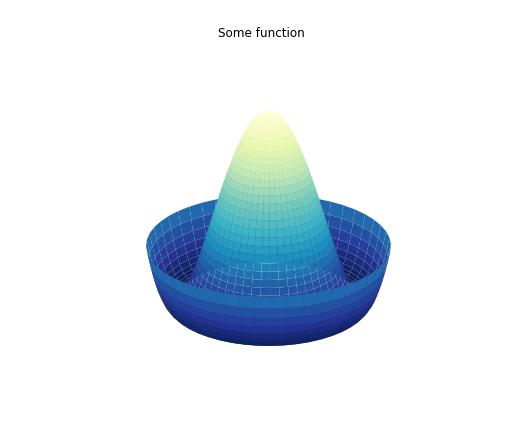

In [10]:
## 3D
# biblioteka do 3D
from mpl_toolkits.mplot3d import Axes3D
# figure - utwórz nowy wykres
# figsize - szerokość, wysokość wykresu
fig = plt.figure(figsize=(9, 7.5))
ax = fig.add_subplot(111, projection='3d')

# utwórz osie w układzie współrzędnych biegunowych
# linspace(a, b, c) - utwórz wektor c równo oddalonych liczb w przedziale [a, b]
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
# zwróć macierz współrzędnych utworzoną z wektorów współrzędnych
R, P = np.meshgrid(r, p)
# przedstaw je jako współrzędne kartezjańskie
X, Y = R*np.cos(P), R*np.sin(P)
# calculate Z
Z = ((R**2 - 1)**2)

# pierwszy parametr to oś X, drugi oś Y, trzeci oś Z, X i Y to tzw. meshgridy
# parametr cmap odpowiada za ustawienie schematu kolorowania
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
# chcemy tylko kształt, usuńmy wszystko inne
ax.set_axis_off()
# ustaw tytuł wykresu
ax.set_title('Some function')
plt.show()

Tak wszyscy prezentują tabelki:
     SVM   kNN    NN  Tree  Forest
1   94.5  42.7  74.2   6.9    30.6
2   35.0  51.0  78.7  31.2    29.0
3   48.1  97.1  29.2  41.6    41.1
4   70.0  45.3  49.1  19.4    95.9
5   78.5  33.9  40.1  54.9    45.3
6   99.0  91.9  78.8  17.5    39.5
7   86.8  87.7  20.7  98.3    70.7
8   97.4  34.7  20.3  97.9     7.9
9    6.7  42.9  95.2  82.1    44.8
10  40.3  60.5  45.4  42.8     8.8

Chociaż w ten sposób lepiej widać, co tak naprawdę się dzieje:


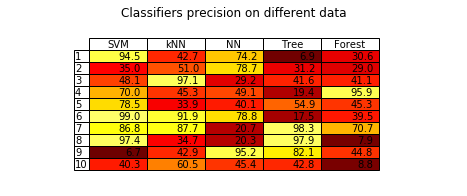

In [11]:
## TABELKI
import matplotlib as mpl
from pandas import DataFrame

idx = np.arange(1, 11)
classifiers = ['SVM', 'kNN', 'NN', 'Tree', 'Forest']

# tabelka wypełniona liczbami 0 do 100
vals = np.around(np.random.rand(10, 5), 3)*100

# normalizator do kolorowania
normal = mpl.colors.Normalize(vals.min()-20, vals.max()+20)

fig = plt.figure(figsize=(8, 3))

ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
ax.set_title("Classifiers precision on different data")

the_table = plt.table(
                cellText=vals,
                rowLabels=idx,
                colLabels = classifiers,
                colWidths = [0.13]*vals.shape[1],
                loc='center', 
                cellColours=plt.cm.hot(normal(vals))
            )

print "Tak wszyscy prezentują tabelki:"
print DataFrame(vals, index=idx, columns=classifiers)
print "\nChociaż w ten sposób lepiej widać, co tak naprawdę się dzieje:"
plt.show()


/home/pocha/libs/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'xkcd', u'Humor Sans', u'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


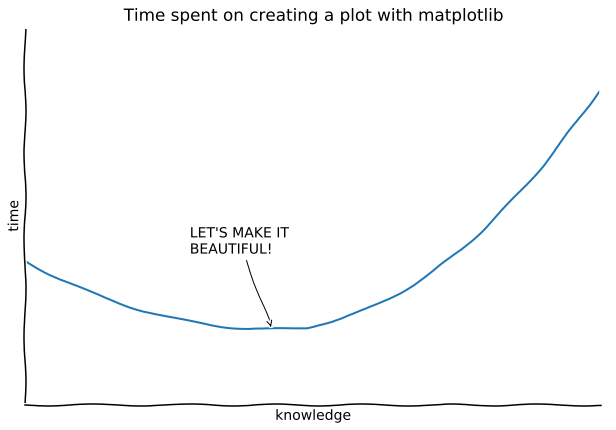

In [12]:
## UPIĘKNIANIE
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure(figsize=(10, 7.5))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_xlim([-3, 4])
    ax.set_ylim([0, 50])

    data = np.ones(100)
    data[:] -= np.arange(100)
    data[30:] += np.arange(70) * 2
    
    x = np.linspace(-3, 4)
    y = x**2
    y[25:] = 2 * x[25:]**2
    y = 10 + y

    plt.annotate(
        "LET'S MAKE IT\nBEAUTIFUL!",
        xy=(0, 10), arrowprops=dict(arrowstyle='->'), xytext=(-1, 20))

    plt.plot(x, y)

    plt.xlabel('knowledge')
    plt.ylabel('time')
    
    
    ax.set_title('Time spent on creating a plot with matplotlib')
plt.show()


### in case of missing fonts: http://stackoverflow.com/questions/20206906/matplotlib-fonts-in-enthought-canopy


## Zadania
Na platformę Pegaz proszę wysłać plik ipythona kodem i wygenerowanymi wykresami. Proszę upewnić się, że plik można poprawnie odtworzyć na platformie: http://try.jupyter.org

1. Poniższy wykres zawiera średnie wartości dla każdej cechy ze zbioru Iris z rozbiciem na gatunki.
<img src="zadanie_iris.png">
 Proszę go odtworzyć. Państwa wykresy powinny wyglądać identycznie tzn. powinny składać się z dokładnie tych samych elementów. Oceniane będą m.in.:
 * kolory (proszę użyć tych ze skryptu poniżej)
 * obecność tytułu
 * obecność legendy
 * brak obramowania legendy
 * obecność wysokości słupków nad słupkami (może być wyżej lub niżej niż na wykresie  wzorcowym)
 * brak 'ticksów"
 * brak obramowania wykresu
 * brak konturów słupków
 * wypisanie nazw cech na osi x
 * usunięcie wartości na osiach x i y z osi

 Uwaga: mogłam coś pominąć, proszę dążyć do tego, by wykresy wyglądały identycznie. Wymagam także, by dane były wygenerowane ze zbioru Iris a nie wpisane z palca!

2. Dane w poniższych komórkach przedstawić w najbardziej czytelnej formie (będzie liczył się dobór rodzaju wykresu oraz jego wygląd, jeśli chodzi o wygląd proszę sugerować się wzorem u góry pliku)

In [13]:
# wykres 1
# Zbiór iris opisuje irysy trzech gatunków.
# Każda kolumna w iris.data zawiera informację o wielkości danej cechy konkretnego kwiatu.
# iris.target zawiera informację o gatunku konkretnego irysa

# zaciąganie irysa...
# ...

# Oto są kolory "Tableau 20" w RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Przeskaluj wartości RGB to skali [0, 1], by była akceptowana przez matplotliba.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 


In [14]:
# wykres 2
"""W państwie Lalum najpopularniejszą rozrywką jest sport. Badminton jako swój
ulubiony sport podało 30% młodzieży, połowa dorosłych i 20% osób starszych. 
Ping-pong zdobył sobie serca takiej samej ilości młodzieży, 10% dorosłych i 20% osób
starszych. Wspinaczka cieszy się popularnością 25% młodzieży, 20% dorosłych i nikogo z osób 
starszych, zaś szachy cieszą 10% młodzieży, 10% dorosłych i 40% osób starszych. Pozostałe 
osoby gustują w mniej popularnych sportach."""

# wykres 3
"""poniżej są dane dotyczące sprzedaży w milionach dolarów paletek do badmintona
najpopularniejszej formy sportowej w państwie Lalum.""" 
day = np.arange(31)+1
sells = np.random.rand(31)

# wykres 4
"""w zeszłym miesiącu 30 kobiet i 40 mężczyzn w państwie Lalum uległo zombifikacji,
15 kobiet i 60 mężczyzn umarło podczas wspinaczki, 20 kobiet i 13 mężczyzn zostało
zwampirzonych, natomiast 34 kobiety i 44 mężczyzn uległo samoistnemu zapłonowi"""

# wykres 5
"""poniżej znajdują się dane nt. liczby przeżytych lat w momencie śmiercie 1000 obywateli
państwa Lalum"""
lifespan = np.random.beta(5, 1, 500) * 100

In [15]:
## http://www.cdc.gov/

# wykres 6
"""Number of deaths for leading causes of death:

    Heart disease: 614,348
    Cancer: 591,699
    Chronic lower respiratory diseases: 147,101
    Accidents (unintentional injuries): 136,053
    Stroke (cerebrovascular diseases): 133,103
    Alzheimer's disease: 93,541
    Diabetes: 76,488
    Influenza and Pneumonia: 55,227
    Nephritis, nephrotic syndrome and nephrosis: 48,146
    Intentional self-harm (suicide): 42,773
"""

# wykres 7
"""
State/Territory 	Births 	Fertility Rate 	Deaths 	Death Rate
Alabama 	59,422 	61.8 	50,215 	1,035.5
Alaska 	11,392 	77.3 	4,128 	560.3
Arizona 	86,887 	66.4 	51,538 	765.6
Arkansas 	38,511 	67.0 	30,467 	1027.1
California 	502,879 	62.4 	245,929 	633.8
Colorado 	65,830 	60.7 	35,237 	657.9
Connecticut 	36,285 	53.0 	29,860 	830.2
Delaware 	10,972 	60.8 	8,260 	882.8
District of Columbia 	9,509 	53.6 	4,723 	716.8
Florida 	219,991 	59.7 	185,956 	934.8
Georgia 	130,946 	62.2 	76,887 	761.5
Hawaii 	18,550 	69.3 	10,767 	758.5
"""

'\nState/Territory \tBirths \tFertility Rate \tDeaths \tDeath Rate\nAlabama \t59,422 \t61.8 \t50,215 \t1,035.5\nAlaska \t11,392 \t77.3 \t4,128 \t560.3\nArizona \t86,887 \t66.4 \t51,538 \t765.6\nArkansas \t38,511 \t67.0 \t30,467 \t1027.1\nCalifornia \t502,879 \t62.4 \t245,929 \t633.8\nColorado \t65,830 \t60.7 \t35,237 \t657.9\nConnecticut \t36,285 \t53.0 \t29,860 \t830.2\nDelaware \t10,972 \t60.8 \t8,260 \t882.8\nDistrict of Columbia \t9,509 \t53.6 \t4,723 \t716.8\nFlorida \t219,991 \t59.7 \t185,956 \t934.8\nGeorgia \t130,946 \t62.2 \t76,887 \t761.5\nHawaii \t18,550 \t69.3 \t10,767 \t758.5\n'

## Bibliografia:
* http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
* dokumentacja matplotliba


### Sidenote
Można też robić wykresy on line: https://plot.ly/